 # Petfinder: Bay Area Dog Adoption
 ![Icon](images/pets.jpg)

### Notebook Contents

- Imports
- Train, Test Split
- Feature Engineering
- LogReg, Bagging Classifier, Random Forest, AdaBoost and XGBoost Models
- Predictions and Confusion Matrix

-------

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from transformers import pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
dogs = pd.read_csv('./petfinder_data/cleandogs.csv')

In [76]:
pd.set_option('display.max_columns', 500)

### X, y and Train, Test, Split

In [3]:
# Creating a list of my categorical columns for later use in modeling
categorical = ['id', 'organization_id', 'name', 'description', 'photos', 'status_changed_at', 'published_at', 'zipcode', 'days_on_petfinder']

In [4]:
# Creating a df of numerical columns for later use in modeling
numerical = dogs.drop(categorical, axis=1)

In [5]:
# Dropping columns from data frame and dummifying categorical columns
X = dogs.drop(columns=categorical)
y = dogs['days_on_petfinder']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    stratify=y,
    random_state=42)

In [7]:
# Baseline
y.value_counts(normalize=True)

1.0    0.529394
0.0    0.470606
Name: days_on_petfinder, dtype: float64

## Modeling

In [8]:
# # Function to display model metrics if needed 
# def score_disp(X_train, X_test, y_train, y_test, gs):
#     best_score = gs.best_score_
#     train_score = gs.score(X_train, y_train)
#     test_score = gs.score(X_test, y_test)

#     print(f'best score: {best_score}')
#     print(f'train score: {train_score}')
#     print(f'test score: {test_score}')
#     print(f'best params: \n{gs.best_params_}')

In [11]:
%%time
# Fitting classification models
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
lr_train = lr.score(X_train, y_train)
lr_test = lr.score(X_test, y_test)

bag = BaggingClassifier()
bag.fit(X_train, y_train)
bag_train = bag.score(X_train, y_train)
bag_test = bag.score(X_test, y_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_train = ada.score(X_train, y_train)
ada_test = ada.score(X_test, y_test)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_train = xgb.score(X_train, y_train)
xgb_test = xgb.score(X_test, y_test)

CPU times: user 1min 43s, sys: 1.03 s, total: 1min 44s
Wall time: 22.9 s


In [12]:
# Creating data frame for visualization of results
model = ['Logistic Regression', 'Bagging', 'Random Forest', 'AdaBoost', 'XGBoost']
train = [lr_train, bag_train, rf_train, ada_train, xgb_train]
test = [lr_test, bag_test, rf_test, ada_test, xgb_test]
results = pd.DataFrame({'model': model, 'train_score': train, 'test_score': test})
results

,model,train_score,test_score
0,Logistic Regression,0.697225,0.685856
1,Bagging,0.974592,0.710625
2,Random Forest,0.993264,0.728732
3,AdaBoost,0.683093,0.679194
4,XGBoost,0.814893,0.729245


### Predictions and Confusion Matrix

In [15]:
# Get predictions
preds = lr.predict(X_test)

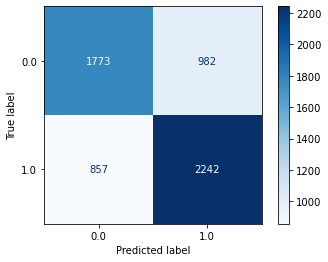

In [28]:
# Confusion matrix

plot_confusion_matrix(lr, X_test, y_test, cmap='Blues', values_format='d');